['Mall_Customers.csv']


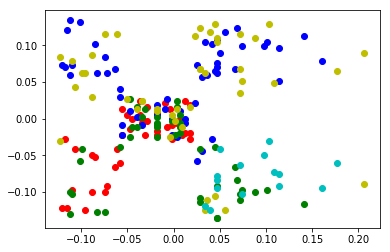

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# distance function used
def dist(a,b):
    k = 0 
    for i in range(0,len(a)):
        k = k + abs(a[i]-b[i])**2
    return k

# data import
import os
print(os.listdir("../input"))
file = pd.read_csv("../input/Mall_Customers.csv")
dataSet = file.values

# feature conversion to integer data-type
for data in dataSet:
    if data[1] == "Female":
        data[1] = 1
    else:
        data[1] = 0
        
#number of clusters
k = 5

#creating extra columns for female male data
male = []
female = []
for data in dataSet:
    if(data[1] == 1):
        male.append([0])
        female.append([1])
    else:
        male.append([1])
        female.append([0])
dataSet = np.c_[ dataSet, male ,female ]
dataSet = dataSet[:,[2,3,4,5,6]]

#number of attributes 
attr = 5

#data standarisation process
μ = [0]*attr
σ = [0]*attr
#calculation for μ
count = 0 
for data in dataSet:
    count = count + 1
    for i in range(0,attr):
        μ[i] = μ[i] + data[i]
for i in range(0,attr):
    μ[i] = μ[i]/count
#calcuation of σ
for data in dataSet:
    for i in range(0,attr):
        σ[i] = σ[i] + (data[i]-μ[i])**2
σ = [math.sqrt(k) for k in σ]
for data in dataSet:
    for i in range(0,attr):
        data[i] = (data[i]-μ[i])/σ[i]
#data standarisation done

#dict1 = {} 
#for i in range(0,6):
#    dict1[frozenset(dataSet[i])] = dataSet1[i]


kMeansIdx = []
for i in range(0,k):
    kMeansIdx.append(int(np.random.uniform(0,k)+k*i))

kLists = []
for i in range(0,k):
    kLists.append([])
for data in dataSet:
    ptr = 0 
    minDis = int(np.random.uniform(1000,2000))
    for i in range(0,k):
        if(dist(data,dataSet[kMeansIdx[i]]) < minDis):
            ptr = i
            minDis = dist(data,dataSet[kMeansIdx[i]])
    kLists[ptr].append(data)
change = np.random.uniform(1000,2000)

#for ele in kLists:
#    print(len(ele))
#print("-----------------------------")

centers = []
while change >= 0.00001:
    kMeansList = []
    for ele in kLists:
        item = [0]*attr
        count = 0
        for e in ele:
            for i in range(0,attr):
                item[i] = item[i] + e[i]
            count = count + 1
        for i in range(0,attr):
            item[i] = item[i]/count
        kMeansList.append(item)
    kLists.clear()
    for i in range(0,k):
        kLists.append([])
    for data in dataSet:
        ptr = 0 
        minDis = int(np.random.uniform(1000,2000))
        for i in range(0,k):
            if(dist(data,kMeansList[i]) < minDis):
                ptr = i
                minDis = dist(data,kMeansList[i])
        kLists[ptr].append(data)
    kMeansTemp = []
    for ele in kLists:
        item = [0]*attr
        count = 0
        for e in ele:
            for i in range(0,attr):
                item[i] = item[i] + e[i]
            count = count + 1
        for i in range(0,attr):
            item[i] = item[i]/count
        kMeansTemp.append(item)
    change = 0
    for i in range(0,k):
        change = change + dist(kMeansList[i],kMeansTemp[i])
    centers = kMeansList


#for item in kLists:
#    for i in range(0,len(item)):
#        print(dict1[frozenset(item[i])])
#    print("----------")


color = ['ro','bo','go','yo','co']
i = 0
for item in kLists:
    x = []
    y = []
    for ele in item:
        x.append(ele[1])
        y.append(ele[2])
    plt.plot(x,y,color[i])
    i = i + 1
plt.show()
#
#X = []
#for x in kMeansIdx:
#    X.append(dataSet[x])
#X = np.array(X)
#kmeans = KMeans(n_clusters = 5,init = X)
#kmeans.fit(dataSet)
#y_kmeans = kmeans.predict(dataSet)
#plt.scatter(dataSet[:, 1], dataSet[:, 2], c = y_kmeans, s=50, cmap='viridis')

#sci_centers = kmeans.cluster_centers_
#diff = []
#for i in range(0,k):
#    temp = []
#    for j in range(0,attr):
#        val = abs(centers[i][j] - sci_centers[i][j])
#        temp.append(val)
#    diff.append(temp)
#diff = np.array(diff)
#for i in range(0,attr)
# Any results you write to the current directory are saved as output.
#print(np.array(centers))
#print(sci_centers)
